## 📈 Manipulación y visualización de la inflación Argentina 💵

## 📚 Importación de librerías

In [1]:
# Manejar fechas
import time
import datetime as dt
import locale

# Manejar datoss
import pandas as pd

# Crear gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter, MultipleLocator, AutoMinorLocator
import seaborn as sns

Link de descarga: https://www.indec.gob.ar/ftp/cuadros/economia/sh_ipc_08_23.xls

In [2]:
#Inflación con divisiones COICOP del INDEC
inflation = pd.read_excel(r"sh_ipc_08_23.xls")
inflation

,Índice de precios al consumidor con cobertura nacional. Resultados por región,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79
0,Período de referencia: Diciembre 2016=100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Variaciones mensuales correspondientes a los m...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Total nacional,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,...,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,"Nota: a partir del mes de junio de 2017, el IN...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Eliminamos filas con NaN
inflation = inflation.dropna()
#Eliminamos la primer columna
inflation = inflation.iloc[:,1:]
#Convertimos la primer fila a mm/yyyy
locale.setlocale(locale.LC_TIME, 'es_ES.utf8')
inflation.iloc[0] = pd.to_datetime(inflation.iloc[0]).dt.strftime('%B/%Y')
#Evitamos que el índice se vaya a llamar según la primer columna
inflation = inflation.reset_index(drop=True)
#Primera fila como encabezados
inflation.columns = inflation.iloc[0]
inflation

,enero/2017,febrero/2017,marzo/2017,abril/2017,mayo/2017,junio/2017,julio/2017,agosto/2017,septiembre/2017,octubre/2017,...,octubre/2022,noviembre/2022,diciembre/2022,enero/2023,febrero/2023,marzo/2023,abril/2023,mayo/2023,junio/2023,julio/2023
0,enero/2017,febrero/2017,marzo/2017,abril/2017,mayo/2017,junio/2017,julio/2017,agosto/2017,septiembre/2017,octubre/2017,...,octubre/2022,noviembre/2022,diciembre/2022,enero/2023,febrero/2023,marzo/2023,abril/2023,mayo/2023,junio/2023,julio/2023
1,1.6,2.1,2.4,2.7,1.4,1.2,1.7,1.4,1.9,1.5,...,6.3,4.9,5.1,6,6.6,7.7,8.4,7.8,6,6.3
2,1.3,1.8,2.8,2.2,1.3,0.9,1.1,2.1,1.8,1.5,...,6.2,3.5,4.7,6.8,9.8,9.3,10.1,5.8,4.1,5.8
3,0.9,4.3,1.9,2.4,1.7,0.7,3,1.3,0.7,3,...,5.4,6.3,7.1,7.3,5.2,8.3,3.8,8.4,4.5,9
4,-1,-0.2,3.4,4.5,1.7,0.9,-1.2,-0.6,3.8,2.1,...,6.8,4.5,4,2.3,3.9,9.4,10.8,7.6,4.2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0.7,0.5,1.3,2.6,2,0.2,0.4,0.8,1,2.1,...,7.4,5.5,3.8,6,4.2,8.1,11.1,7.2,5.7,6.9
129,1.8,1.7,1.7,1.7,2,1.3,1.4,1.7,1.4,1.2,...,6.5,4.4,4.3,5.5,6.7,6.6,8.3,7.2,6.5,7.8
130,6.2,2.5,4.1,2.7,0.5,0.9,2.7,2.3,1.1,2.7,...,6.5,6.3,6,7.3,3.6,7.5,4.9,7.4,8.8,8.5
131,1.3,1.5,1.5,1.7,1.7,0.9,1.2,1.6,1.1,1.5,...,6.5,4.8,4.5,5.4,6,7.1,8.8,7.2,6.2,7.7


In [4]:
#Nos quedamos sólo con el Total General (segunda fila) y borramos la primer columna
inflation = inflation.iloc[1:2,:].reset_index(drop=True)
#Invertimos el dataset de manera que la Fecha se vuelve el índice
inflation = inflation.T
#Renombramos la columna
inflation.columns = ["Inflación"]
#Renombramos el índice
inflation = inflation.rename_axis("Fecha")
inflation

,Inflación
Fecha,
enero/2017,1.6
febrero/2017,2.1
marzo/2017,2.4
abril/2017,2.7
mayo/2017,1.4
...,...
marzo/2023,7.7
abril/2023,8.4
mayo/2023,7.8


## 📈 Visualización de la Inflación Mensual

¡No hay que dejar de tener en cuenta que la inflación siempre acumula, es decir el aumento de los precios puede ser menor, pero siempre será más caro que antes!

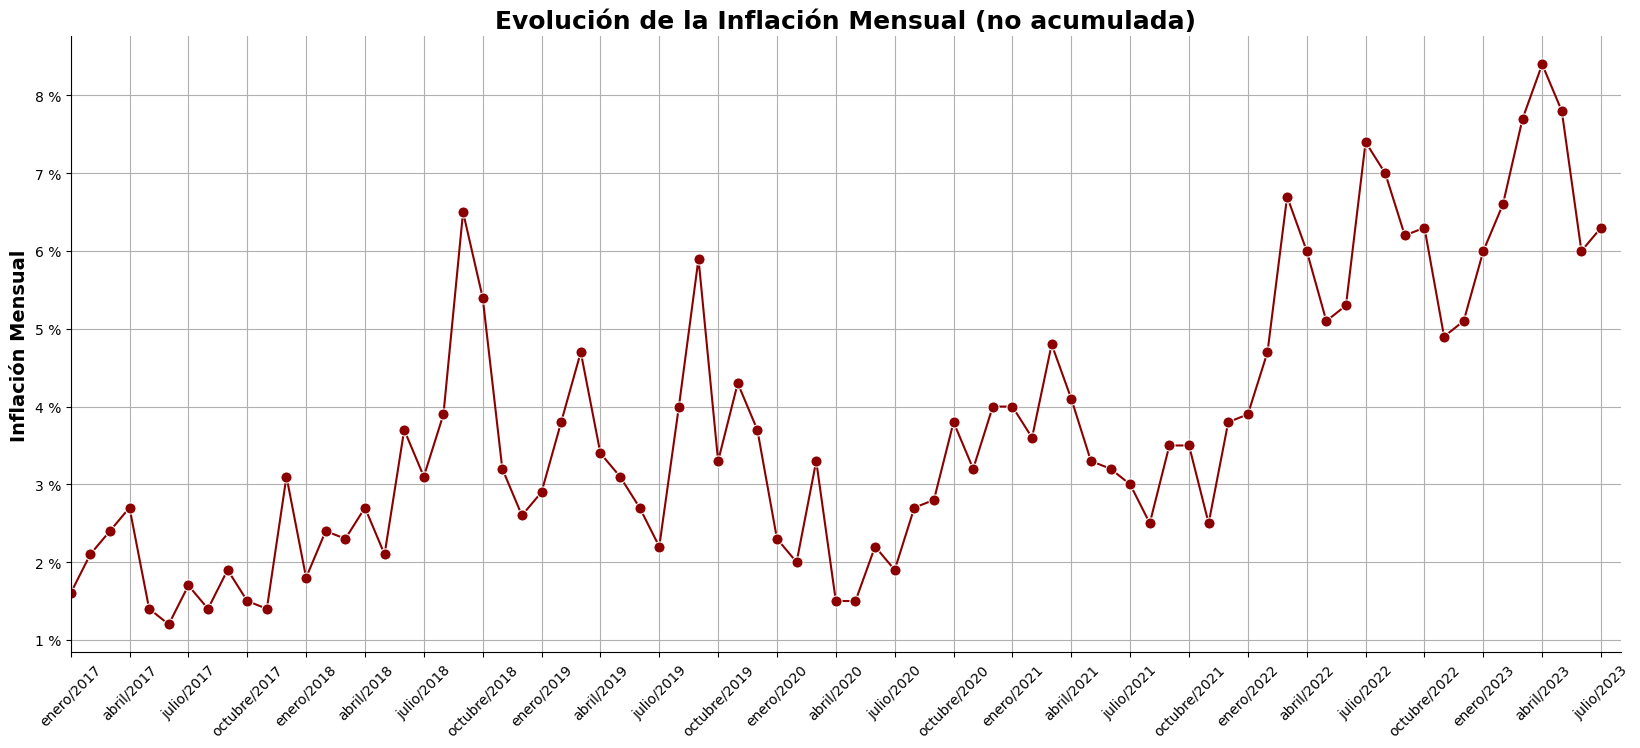

In [5]:
#Gráfico inflación mensual NO ACUMULADA
cantidad_filas = inflation.shape[0]

plt.figure(figsize=(20, 8))
sns.lineplot(
    x="Fecha",
    y="Inflación",
    data=inflation,
    color="darkred",
    marker='o',
    markersize=8
)

# Configurar los ticks del eje X para mostrar cada 3 meses
plt.xticks(range(0, cantidad_filas, 3), rotation=45)
plt.xlim(0, cantidad_filas - 1)


plt.title("Evolución de la Inflación Mensual (no acumulada)",
         fontweight="bold",
         fontsize=18)
plt.ylabel("Inflación Mensual",
          fontweight="bold",
          fontsize=14)
plt.xlabel("")

#gca = Get Current Axis
plt.gca().yaxis.set_major_formatter(FuncFormatter("{:,.0f} %".format))

plt.xlim(0, cantidad_filas)

plt.grid(True)
sns.despine()
plt.savefig("Inflación Mensual.jpg") #guardamos en .jpg
plt.show()

Vemos que la inflación es bastante volátil, aunque en los últimos meses se incrementó con más rapidez previo a las elecciones.

## 📈 Visualización de la Inflación Agregada

La inflación al ser porcentual, para poder sumarla, debemos multiplicar su valor mes a mes, siempre agregándole 1. De esta manera, al graficar, vamos a obtener un palo de hockey, lo cual nos haría pensar que la inflación incrementó extremadamente mucho en el último tiempo. Esto no es exactamente correcto, ya que al multiplicarse todos los valroes anteriores, es obvio que la inflación crecerá en forma exponencial.
Esto ocurre con muchas variables de la economía, puesto que muchas variables son acumulativas.

In [6]:
#A la columna inflación la dividimos por 100 para que sea %, le sumamos 1 para poder multiplicar
#Le aplicamos cumprod (multiplica acumuladamente) y le restamos el uno que sumamos para cada fila
#Lo multiplicamos por 100 para que coincida con el formato del eje Y de antes
inflation["Inflación Agregada"] = ((inflation["Inflación"]/100+1).cumprod()-1)*100
inflation

,Inflación,Inflación Agregada
Fecha,,
enero/2017,1.6,1.6
febrero/2017,2.1,3.7336
marzo/2017,2.4,6.223206
abril/2017,2.7,9.091233
mayo/2017,1.4,10.61851
...,...,...
marzo/2023,7.7,1279.330388
abril/2023,8.4,1395.19414
mayo/2023,7.8,1511.819283


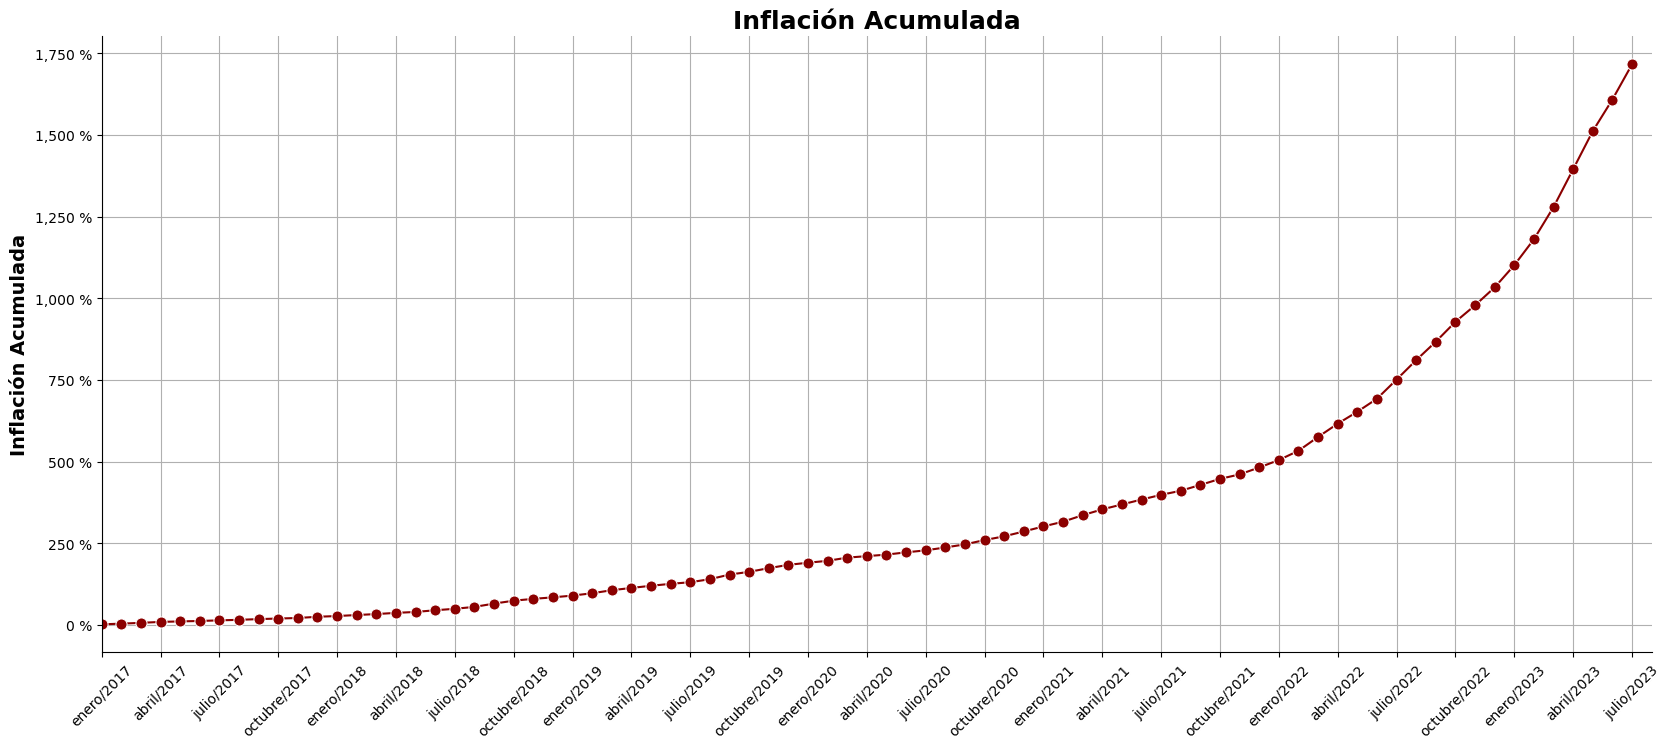

In [7]:
#Gráfico inflación mensual ACUMULADA
cantidad_filas = inflation.shape[0]

plt.figure(figsize=(20, 8))
sns.lineplot(
    x="Fecha",
    y="Inflación Agregada",
    data=inflation,
    color="darkred",
    marker='o',
    markersize=8
)

# Configurar los ticks del eje X para mostrar cada 3 meses
plt.xticks(range(0, cantidad_filas, 3), rotation=45)
plt.xlim(0, cantidad_filas - 1)


plt.title("Inflación Acumulada",
         fontweight="bold",
         fontsize=18)
plt.ylabel("Inflación Acumulada",
          fontweight="bold",
          fontsize=14)

plt.gca().yaxis.set_major_formatter(FuncFormatter("{:,.0f} %".format))


plt.xlim(0, cantidad_filas)
plt.xlabel("")

plt.grid(True)
sns.despine()
plt.savefig("Inflación Acumulada.jpg")
plt.show()

## 📈 Visualización de la Inflación Agregada (escala logarítmica)

Mediante la escala logarítmica podemos suavizar el crecimiento de la inflación acumulada, de manera que los últimos periodos no se llevan todo el peso de la acumulación. La contra es que es difícil de leer (y no es tan dramático 😉).

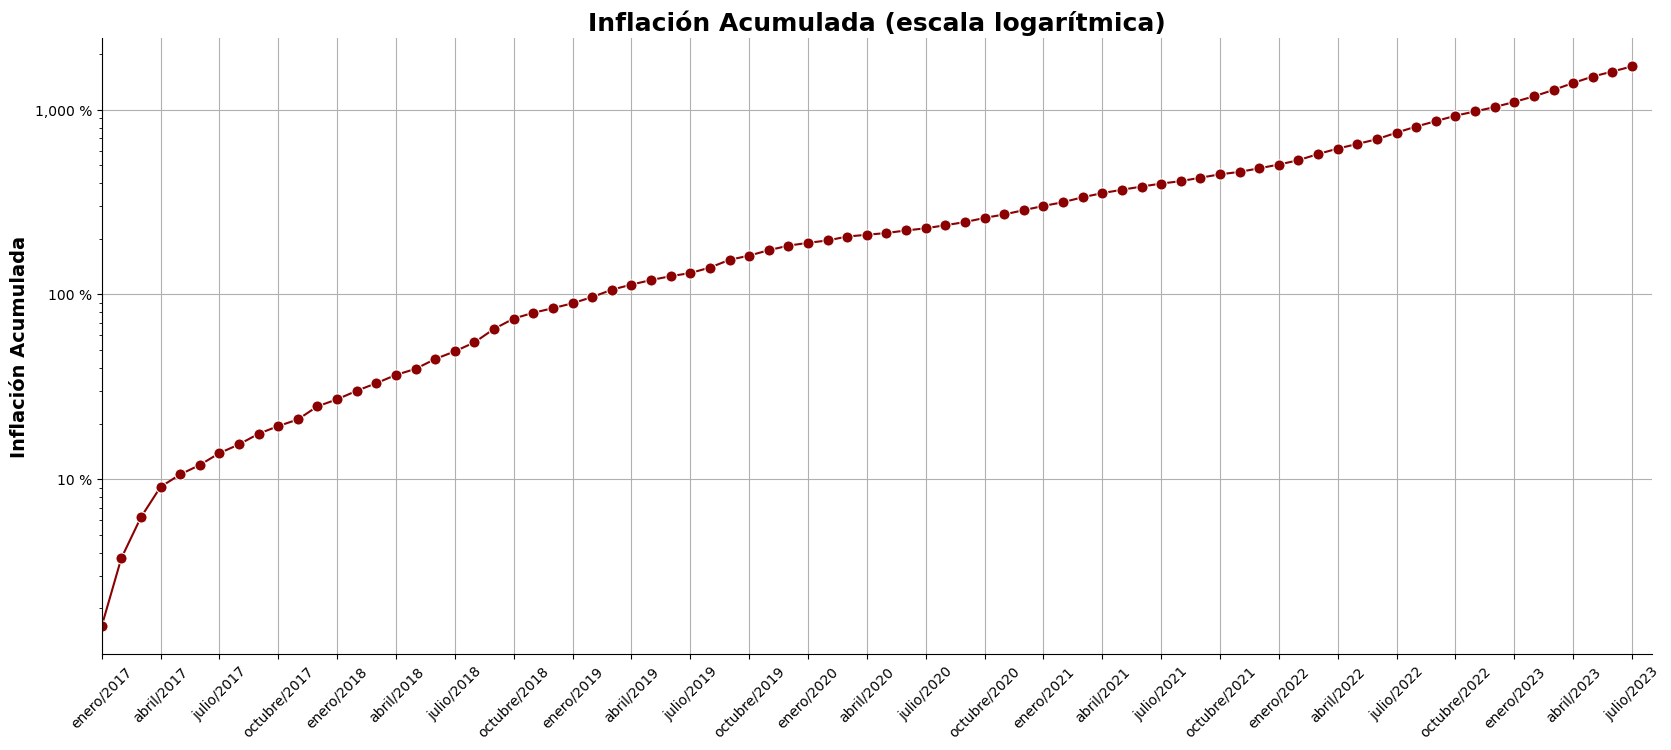

In [8]:
#Gráfico inflación mensual ACUMULADA logarítmica
plt.figure(figsize=(20, 8))
sns.lineplot(
    x="Fecha",
    y="Inflación Agregada",
    data=inflation,
    color="darkred",
    marker='o',
    markersize=8
).set_yscale("log") #escala logarítmica

# Configurar los ticks del eje X para mostrar cada 3 meses
plt.xticks(range(0, cantidad_filas, 3), rotation=45)
plt.xlim(0, cantidad_filas - 1)


plt.title("Inflación Acumulada (escala logarítmica)",
         fontweight="bold",
         fontsize=18)
plt.ylabel("Inflación Acumulada",
          fontweight="bold",
          fontsize=14)

plt.gca().yaxis.set_major_formatter(FuncFormatter("{:,.0f} %".format))


plt.xlim(0, cantidad_filas)
plt.xlabel("")

plt.grid(True)
sns.despine()
plt.savefig("Inflación Acumulada (escala logarítmica).jpg")
plt.show()